# Модуль А

Требуется предобработать данные для последующего использования их в модели.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [ ]:
df = pd.read_csv('pump.csv')
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


### Обработка данных

##### Удалим Unnamed: 0, ведь это просто лишние индексы

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


##### Изучим кол-во ненулевых данных и тип данных

In [ ]:
df.isnull().sum()

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

##### Мы можем увидеть, то сенсор 15 выдает только пустые значения, а значит он не несет никакого смысла. Удалим этот столбец

In [ ]:
df = df.drop('sensor_15', axis=1)

##### Т.к. сенсоры фиксируют числовые значения помпы, то мы можем заменить их нулевые значения на mean (Можно было бы заменить на 0, если бы мы поняли, что отсутствие значение, могло бы означать, то что помпа не работает). Для сенсоров 0, 50 и 51 нужно рассмотреть детальнее, ведь пустых значений в них достаточно, чтобы неверная обработка могла испортить будущую модель.

In [ ]:
df['sensor_00'].describe()

count    210112.000000
mean          2.372221
std           0.412227
min           0.000000
25%           2.438831
50%           2.456539
75%           2.499826
max           2.549016
Name: sensor_00, dtype: float64

##### Мы видим нулевые значения, а значит нужно взглянуть на кол-во таких данных. Если их будет достаточно много, то пустые значения стоит будет сделать нулями

In [ ]:
len(df[df['sensor_00'] == 0])

19

##### Значений всего 19, а значит мы тоже заменим на среднее значения. Повторим процедуру для 50 и 51 сенсоров

In [ ]:
df['sensor_50'].describe()

count    143303.000000
mean        183.049260
std          65.258650
min          27.488426
25%         167.534700
50%         193.865700
75%         219.907400
max        1000.000000
Name: sensor_50, dtype: float64

In [ ]:
df['sensor_51'].describe()

count    204937.000000
mean        202.699667
std         109.588607
min          27.777779
25%         179.108800
50%         197.338000
75%         216.724500
max        1000.000000
Name: sensor_51, dtype: float64

##### Здесь нулевые значения вовсе не наблюдаются. Начнем избавляться от пустых значений

In [ ]:
cat_cols = ['timestamp', 'machine_status']
num_cols = [col for col in df.columns.tolist() if col not in cat_cols]

In [ ]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [ ]:
df.isnull().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


##### Удалим дубликаты в следующем модуле, когда удалим timestamp при подготвке данных к обучению модели

##### Для того, чтобы понять, что еще потребуется в предобработке начнем составлять графики

## Предварительное изучение

##### Начнем со статического анализа переменных

In [ ]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.402564,3.293904,3.666662,2.418782,144.017702,17.297501,2.140046,2.173755,2.013639,2.070033,...,10.258892,11.043727,11.575646,12.836733,15.640325,10.441797,82.239917,19.142425,52.630590,105.693568
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.419155,46.310760,50.390620,42.838539,626.620400,69.977213,13.346350,15.856480,15.183740,15.010130,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600
50%,2.455556,48.133678,51.649300,44.227428,632.638916,75.576145,13.628470,16.167530,15.451390,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,183.049260,199.942100
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,204.571800,214.699100
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [ ]:
df.iloc[:, 21 :].describe()

,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,226.671085,154.513958,291.824683,182.291359,220.847121,246.652412,169.817006,313.062664,225.727198,195.610904,...,10.258892,11.043727,11.575646,12.836733,15.640325,10.441797,82.239917,19.142425,52.630590,105.693568
min,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,875.461300,478.942500,950.919700,601.149500,693.932600,790.343525,448.299675,782.685650,518.964700,627.777800,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600
50%,879.697300,531.854100,981.924500,625.872650,740.199250,861.831750,494.475250,967.231500,564.894700,668.981400,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,183.049260,199.942100
75%,882.129800,534.254400,1090.807250,628.607500,750.356125,919.098450,536.272050,1043.972000,743.947000,697.222200,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,204.571800,214.699100
max,1107.526000,594.061100,1227.564000,1000.000000,839.575000,1214.420000,2000.000000,1841.146000,1466.281000,1600.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [ ]:
df.iloc[:, 41 :].describe()

,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,7.898181,10.258892,11.043727,11.575646,12.836733,15.640325,10.441797,82.239917,19.142425,52.630590,105.693568
min,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600
50%,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,183.049260,199.942100
75%,37.760410,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,204.571800,214.699100
max,420.312500,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


##### Воспользуемся матрице корреляции. Для наглядности воспользуемся тепловыми картами

<ipython-input-75-f044f2f5ad42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


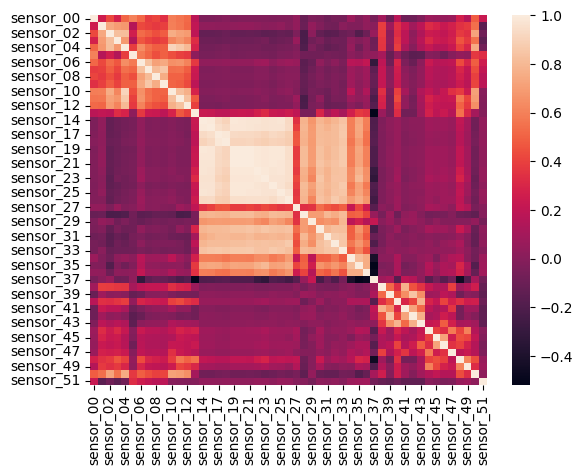

In [ ]:
sns.heatmap(df.corr());

In [ ]:
df_first_half = df.iloc[:, : 27]
df_first_half.assign(e = df['machine_status'])
df_second_half = df.iloc[:, 27 :]

<ipython-input-77-5b5782b1ba30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_first_half.corr());


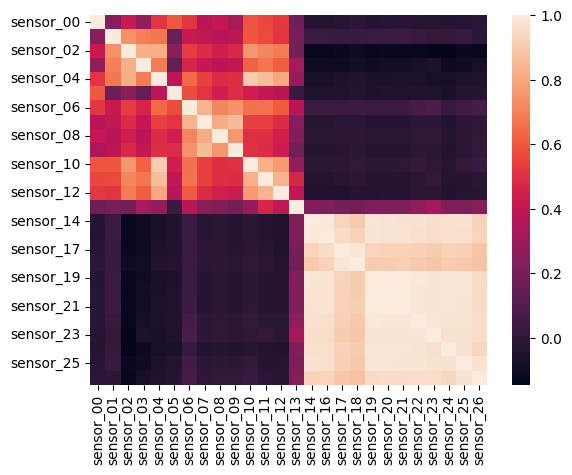

In [ ]:
sns.heatmap(df_first_half.corr());

<ipython-input-78-90f64f9a927d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_second_half.corr());


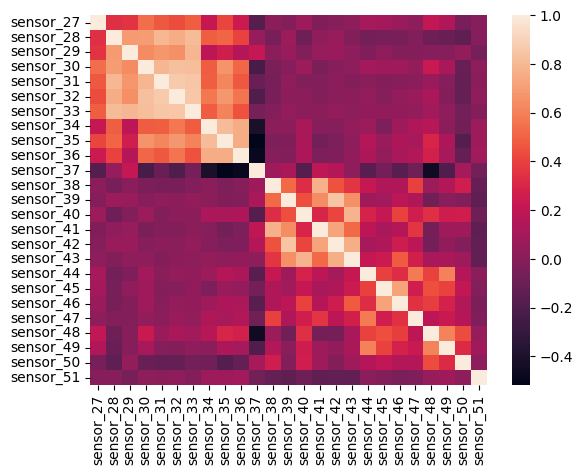

In [ ]:
sns.heatmap(df_second_half.corr());

##### Благодаря матрице корреляции мы заметили, что сенсоры 14-26 имеют связь. Посмотрим как они зависимы. Так как они все зависят друг от друга, то нам достаточно взгянуть на график рассеяния для двух из них.

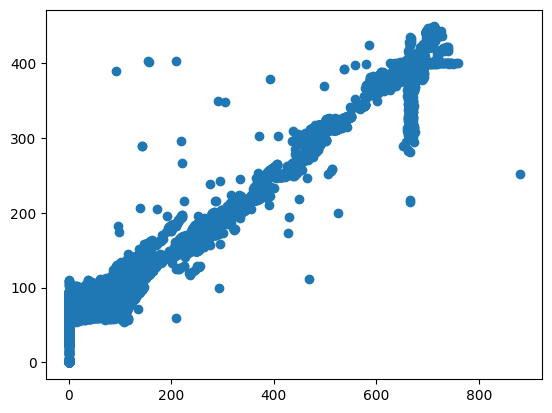

In [ ]:
plt.scatter(df['sensor_19'], df['sensor_20']);

##### Мы можем наблюдать линейную зависимость между признаками 19 и 20, а значит и между признаками 14-26. Рассмотрим не настолько выделенные зависимости. К примеру разберем зависимость сенсора 17 от сенсора 18. Не смотря на то, что они связаны с другими сенсорами из группы 14-26, но немного отличаются

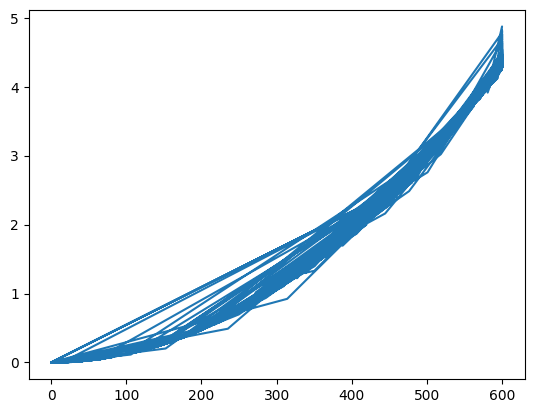

In [ ]:
plt.plot(df['sensor_17'], df['sensor_18']);

##### Можем заметить квадратичную зависимость между этими данными. Рассмотрим распределения данных с помощью гистограммы у сенсора 13, ведь его отклонение близко к среднему значению, а значит он может иметь не нормальное распределение

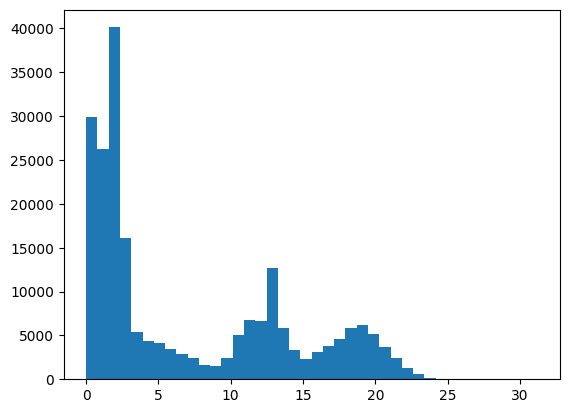

In [ ]:
plt.hist(df['sensor_13'], bins=40);

Данное распределение похоже на показательное. Рассмотрим этот же сенсор с помощью коробки с усами

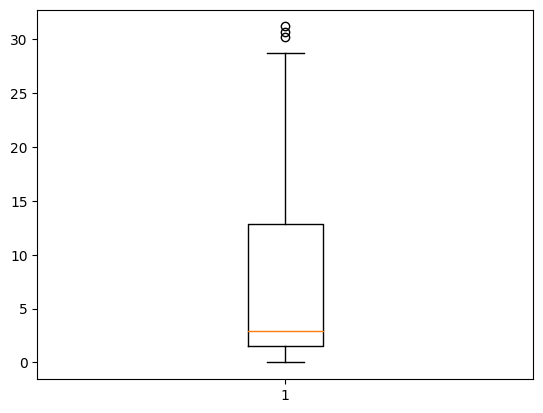

In [ ]:
plt.boxplot(df['sensor_13']);

# Модуль B

## Отбор признаков

##### Преобразуем целевой признак Label Encoder'ом, чтобы найти корреляцию между ним и сканерами

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['machine_status'] = le.fit_transform(df['machine_status'])
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,1
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,1
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037,1
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250,1
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921,1
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921,1
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602,1
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,183.04926,234.0856,1


##### Избавимся от первого признака, ведь он уникален для каждого из объектов

In [ ]:
df = df.drop('timestamp', axis=1)
df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,1
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,1
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037,1
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250,1
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921,1
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921,1
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602,1
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,183.04926,234.0856,1


##### Найдем корреляцию

<ipython-input-85-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

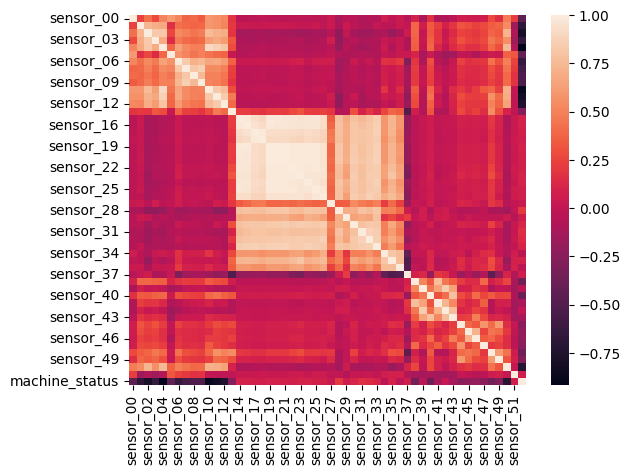

In [ ]:
sns.heatmap(df.corr())

##### Воспользуемся хи-квадратом, чтобы узнать зависимы ли первые сенсоры с целевым признаком

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi2(df.iloc[:, : -1], df['machine_status'])

(array([3.07370377e+03, 2.27170621e+04, 3.64640572e+04, 1.23022705e+04,
        6.49300832e+06, 1.69480620e+05, 3.06445552e+04, 2.05934626e+04,
        1.58508854e+04, 1.74811847e+04, 5.91361409e+05, 6.07405391e+05,
        4.45190340e+05, 1.07916208e+05, 6.29846820e+04, 6.68370665e+04,
        4.86134693e+04, 2.42299883e+02, 1.15139127e+05, 4.81087555e+04,
        1.01423891e+05, 7.21928348e+04, 1.86077299e+05, 1.28547263e+05,
        1.01176490e+05, 9.85196840e+04, 1.35151230e+04, 1.04805359e+06,
        5.51798913e+04, 1.79535156e+05, 5.15520107e+05, 3.45998363e+05,
        1.12608226e+05, 1.14773880e+04, 8.61629480e+04, 1.17552199e+04,
        2.37163893e+04, 6.45210742e+04, 1.37469736e+03, 2.06263386e+05,
        4.29422837e+03, 9.28416133e+01, 8.69751546e+03, 3.84600070e+04,
        3.45565728e+04, 4.60565958e+04, 3.52856933e+04, 1.32754093e+06,
        1.15294090e+05, 1.71238474e+06, 5.34242971e+04]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
  

##### Все сенсоры зависимы.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df.iloc[:, : -1])
X_pca

array([[ 6.99421815e+01,  2.65865297e+02, -4.29093874e+02, ...,
         6.57809896e+00, -1.44138235e+01, -2.35000045e+01],
       [ 6.99421815e+01,  2.65865297e+02, -4.29093874e+02, ...,
         6.57809896e+00, -1.44138235e+01, -2.35000045e+01],
       [ 2.82501110e+01,  2.83621565e+02, -4.00744476e+02, ...,
         9.66644969e+00, -1.66869277e+01,  2.11966239e+01],
       ...,
       [-3.00199727e+02, -2.56921670e+02,  5.86005473e+01, ...,
         1.35922282e+01,  3.15851087e+00, -3.23831519e+01],
       [-2.85133341e+02, -2.63087081e+02,  6.30461136e+01, ...,
         1.65761189e+01,  1.47212059e+01, -2.74071761e+01],
       [-2.98173703e+02, -2.64531555e+02,  5.06820347e+01, ...,
         1.63215530e+01, -2.39073753e-01, -3.14344303e+01]])

##### Понижение размерности данных может быть целесообразно, т.к. мы имеем достаточно большое кол-во признаков, но это нужно смотреть на практике.

## Визуализация

##### Для визуализации зависимости данных мы снова воспользуемся тепловой картой корреляций

<Axes: >

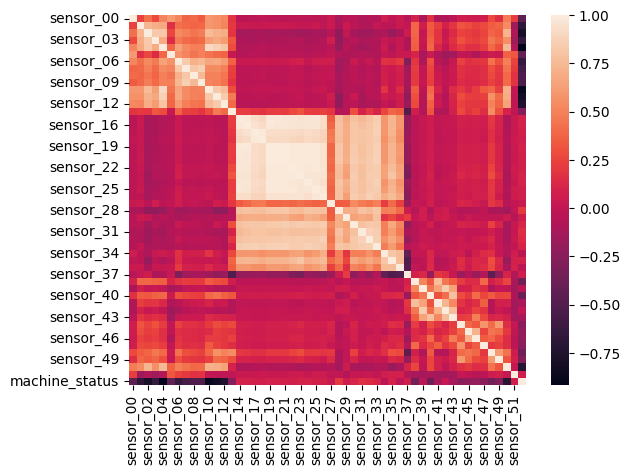

In [ ]:
sns.heatmap(df.corr())

##### Собирать каллаж из гистограмм или графиков рассеяния не имеет смысла, ведь те данные, которые имели интересные зависимости уже были представлены в модуле А

##### Перед тем, как разбивать на подвыборки удалим лишние данные и проведем масштабирование

In [ ]:
df.drop_duplicates()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,1
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037,1
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250,1
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889,1
5,2.453588,47.09201,53.168400,46.397568,637.615700,78.18568,13.41146,16.16753,15.89265,15.16204,...,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.60880,201.6782,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921,1
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921,1
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602,1
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,183.04926,234.0856,1


##### Так как мы увидели, что некоторые признаки обладают не нормальным распределением, а также мы будем делать 3 модели, некоторые из которых могут быть не завязаны на длине векторов мы воспользуемся MinMaxScaling'ом

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = df['machine_status']
X = df.drop('machine_status', axis=1)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Разбиение данных на обучающую и тестовую выборку

In [ ]:
y.value_counts()

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

##### В качестве разбиения будем пользоваться стратификацией, ведь целевой признак имеет несбалансированные классы

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=df['machine_status'], random_state=33)

## Выбор модели

##### Наша задача - задача классификации. Так как мы не пользовались нормализцией при масштабировании SVM наверняка будет не таким эффективным, по сравнению с использованием нормализации. Первой моделью используем NaiveBayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
gnb.score(X_test, y_test)

0.9445806100217865

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

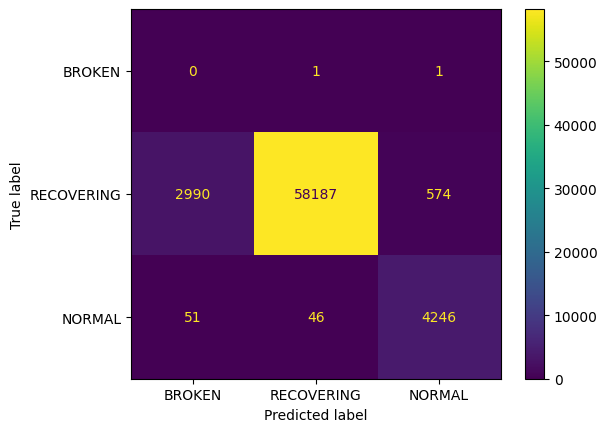

In [ ]:
y_pred = gnb.predict(X_test)
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["BROKEN", "RECOVERING", "NORMAL"],
)
cmp.plot()
plt.show();

##### Мы видим хорошую картину, если не считать, что ни один класс из сломанных не был найден правильно

##### Следом мы попробуем ансамбль. Создадим модель случайного леса

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

bagging_classifier = BaggingClassifier(base_estimator=tree, n_estimators=10, max_samples=0.5, max_features=0.5)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
bagging_classifier.score(X_test, y_test)

0.9997579278625031

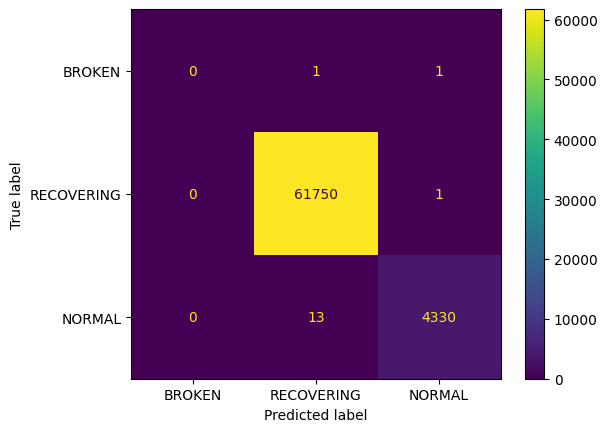

In [ ]:
y_pred = bagging_classifier.predict(X_test)
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["BROKEN", "RECOVERING", "NORMAL"],
)
cmp.plot()
plt.show();

##### Ситуация лучше чем у Байеса, но все еще не определен ни один сломанный насос

##### Попробуем стекинг. Будем менять логистическую регрессию с Байесом

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
estimators = [
    ("lr2", LogisticRegression(max_iter=500)),
    ("nb1", GaussianNB()),
    ("lr1", LogisticRegression(max_iter=500)),
]

model = StackingClassifier(estimators=estimators,
                           final_estimator=LogisticRegression(),
                           cv=3)

model.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('lr2', LogisticRegression(max_iter=500)),
                               ('nb1', GaussianNB()),
                               ('lr1', LogisticRegression(max_iter=500))],
                   final_estimator=LogisticRegression())

In [ ]:
model.score(X_test, y_test)

0.9970194868070685

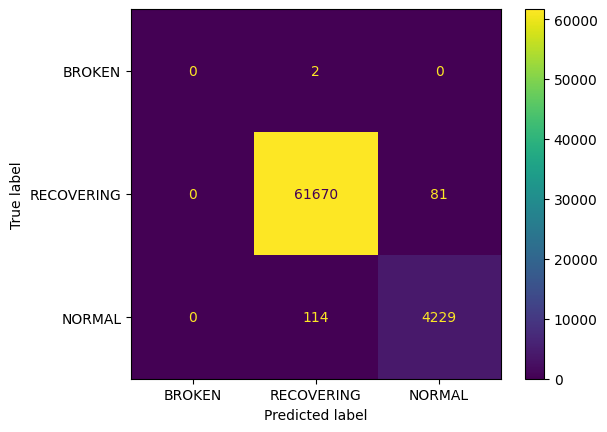

In [ ]:
y_pred = model.predict(X_test)
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["BROKEN", "RECOVERING", "NORMAL"],
)
cmp.plot()
plt.show();

##### Лучше всего себя показал случайный лес

##### Проблема каждой из этих моделей в том, что никто из них не определил сломанные насосы. Стратификация не помогла

# Модуль C

In [ ]:
!pip install -q streamlit

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q joblib

In [ ]:
import pickle

In [ ]:
pickle.dump(gnb, open('/content/drive/MyDrive/NaiveBayes.sav', 'wb'))

In [ ]:
pickle.dump(bagging_classifier, open('/content/drive/MyDrive/Bagging.sav', 'wb'))

In [ ]:
pickle.dump(model, open('/content/drive/MyDrive/Stacking.sav', 'wb'))

In [ ]:
nb_path = "https://drive.google.com/file/d/1IMSGKGPAm-i1Txvn5dEPT1mcDIoESTrE/view?usp=drive_link"
bg_path = "https://drive.google.com/file/d/1pjIz6Sq-UzhRPjEO5kIcLWBIAnn2MFqi/view?usp=drive_link"
st_path = "https://drive.google.com/file/d/1xfpAwj_nc88z2BhoD3i8MZFSXUVzYp2E/view?usp=drive_link"

In [ ]:
import os


id_slice = slice(32, 65)

nb_file_id = nb_path[id_slice]
bg_file_id = bg_path[id_slice]
st_file_id = st_path[id_slice]

os.system(f"wget -q -O nb.sav https://drive.google.com/uc?id={nb_file_id}")
os.system(f"wget -q -O bg.sav https://drive.google.com/uc?id={bg_file_id}")
os.system(f"wget -q -O st.sav https://drive.google.com/uc?id={st_file_id}")

0

In [ ]:
%%writefile description.py
import streamlit as st

st.set_page_config(
    page_title="Описание датасета",
)

st.sidebar.write("Выберите страницу сверху")

st.markdown(
    """
    # Датасет — контроль состояния водяной помпы
    1. timestamp —- время фиксации данных (дата и время)
    2. sensor_00 - sensor_51 — Зафиксированные сенсорами результаты (вещественное число)
    3. machine_status — состояние водяной помпы (один из трех классов: BROKEN, RECOVERING или NORMAL)
    """
)

Overwriting description.py


In [ ]:
%%writefile pages/models.py
import streamlit as st

st.set_page_config(
    page_title="Описание моделей",
)

st.sidebar.write("Выберите страницу сверху")

st.markdown(
    """
    # Модели
    Были выбранны данные модели:
    1. NaiveBayes (accuracy - 0.944)
    2. Random Forest (accuracy - 0.999)
    3. Stacking LogisticRegression -> NaiveBayes -> LogisticRegression (accuracy - 0.995)
    """
)

Overwriting pages/models.py


In [ ]:
%%writefile pages/predict.py
import streamlit as st
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib as jb
import pickle

st.set_page_config(
    page_title="Получение предсказаний",
)

get_model = {
        'Naive Bayes': '/content/nb.sav',
        'Random Forest': '/content/bg.sav',
        'Stacking': '/content/st.sav'
        }

optioni = st.sidebar.selectbox('Выберите тип загрузки', ('Задание параметров', 'CSV'))

optionm = st.selectbox("Выберите модель",
                      ('Naive Bayes', 'Random Forest', 'Stacking')
                      )
model = None

try:
    model = open(get_model[f'{option}'], 'rb')
    st.sidebar.success(f'Модель \"{optionm}\" успешно загружена')
except:
    st.sidebar.error(f'Модели нет или она не успела загрузиться')


if optioni == 'Задание параметров':
  df = pd.DataFrame({'sensore_00': 0}, index=[0])
  cfg = dict()
  for i in range(1, 52):
    cfg[f'sensor_{str(i).zfill(2)}'] = st.column_config.NumberColumn()
    df[f'sensor_{str(i).zfill(2)}'] = 0
  ds = st.data_editor(df, column_config=cfg, hide_index=True)
else:
  upload = st.file_uploader("Выберите CSV для предсказания", type='csv')
  ds = pd.read_csv(upload)

if ds is not None and model is not None:
  scaler = MinMaxScaler()
  X = scaler.fit_transform(ds)
  jbmodel = pickle.load(model)
  y_pred = jbmodel.predict(X)
  if y_pred == 2:
    st.success('NORMAL')
  elif y_pred == 1:
    st.warning('RECOVERING')
  else:
    st.error('BROKEN')
  st.table(datatab)


Overwriting pages/predict.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.101s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/description.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.681s
your url is: https://proud-chicken-throw.loca.lt
^C


In [ ]:
!curl ipecho.net/plain

34.73.56.14